In [1]:
# Nativos
import os
import sys

#calculo
import numpy as np
import pandas as pd
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

#warning ignore future
import warnings
warnings.filterwarnings('ignore')

from extract import Extract

In [2]:
df = pd.read_excel(
    'https://s3.amazonaws.com/amp.ec/peru21_new.xlsx', parse_dates=['Fecha']
).sort_index()

df.index = df['Fecha']
del df.index.name
df.head()

,Unnamed: 0,Dia,Mes,Año,Producto,Fecha,CodigoSapAgencia,NombreAgencia,CodigoSapCanilla,NombreCanilla,Pauta,Devolucion,VentaNeta,Lim Inf,Proy Holt,Lim Sup
2018-01-01,NaN,lunes,Enero,2018,Peru 21,2018-01-01,1200000047,JESUS MARIA,1300000086,AGUIRRE MANRIQUE CLAUDIA,25.0,0.0,25.0,NaN,NaN,NaN
2018-01-01,NaN,lunes,Enero,2018,Peru 21,2018-01-01,1200000047,JESUS MARIA,1300000087,AGUIRRE MANRRIQUE JUAN BAUTISTA,19.0,1.0,18.0,NaN,NaN,NaN
2018-01-01,NaN,lunes,Enero,2018,Peru 21,2018-01-01,1200000047,JESUS MARIA,1300000088,AGUIRRE MANRRIQUE MARISA QYSIRE,7.0,1.0,6.0,NaN,NaN,NaN
2018-01-01,NaN,lunes,Enero,2018,Peru 21,2018-01-01,1200000047,JESUS MARIA,1300000279,ALVAREZ SOTO JUAN DE DIOS,0.0,0.0,0.0,NaN,NaN,NaN
2018-01-01,NaN,lunes,Enero,2018,Peru 21,2018-01-01,1200000047,JESUS MARIA,1300000530,ARREDONDO MOLINA MAURA SANTA PAULINA,12.0,3.0,9.0,NaN,NaN,NaN


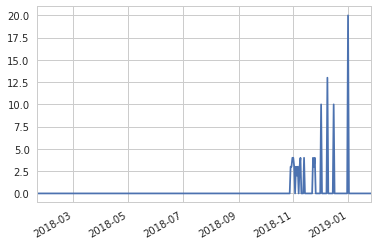

In [3]:
data_1300013878 = df[df['CodigoSapCanilla'] == 1300013878][['VentaNeta', 'Pauta']]
data_1300013878['ausencia'] = data_1300013878['Pauta'].apply(lambda _: 0 if _ and _ > 0 else 1)
data_1300013878['pauta_cunsum'] = data_1300013878['ausencia'].rolling(7).sum()
data_1300013878['Pauta'].plot()

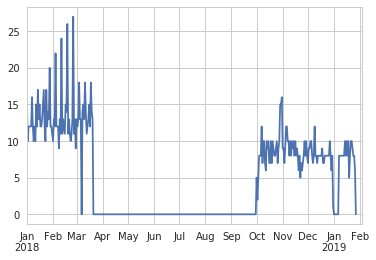

In [4]:
data_1300007778 = df[df['CodigoSapCanilla'] == 1300007778][['VentaNeta', 'Pauta']]
data_1300007778['ausencia'] = data_1300007778['Pauta'].apply(lambda _: 0 if _ and _ > 0 else 1)
data_1300007778['pauta_cunsum'] = data_1300007778['ausencia'].rolling(7).sum()
data_1300007778['Pauta'].plot()

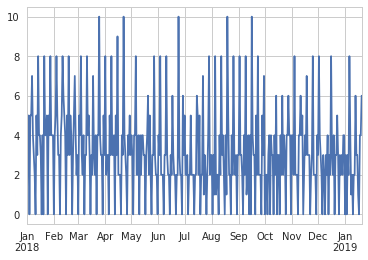

In [21]:
data_1300011597 = df[df['CodigoSapCanilla'] == 1300011597][['VentaNeta', 'Pauta', 'Fecha']][:'2019-01-20']
data_1300011597['weekday'] = data_1300011597['Fecha'].dt.weekday
data_1300011597['Pauta'].plot()

In [22]:
 data_1300011597['VentaNetax'] = data_1300011597[['Pauta', 'VentaNeta']].apply(
            lambda _: _['VentaNeta'] if _['Pauta'] > 0 else np.nan, 
            axis=1
        )

In [23]:
data_1300011597.head()

,VentaNeta,Pauta,Fecha,weekday,VentaNetax
2018-01-01,0.0,0.0,2018-01-01,0,NaN
2018-01-02,3.0,4.0,2018-01-02,1,3.0
2018-01-03,4.0,5.0,2018-01-03,2,4.0
2018-01-04,0.0,0.0,2018-01-04,3,NaN
2018-01-05,4.0,5.0,2018-01-05,4,4.0


In [24]:
data_1300011597['VentaNetax'].isnull().sum()

63

In [25]:
data_1300011597

,VentaNeta,Pauta,Fecha,weekday,VentaNetax
2018-01-01,0.0,0.0,2018-01-01,0,NaN
2018-01-02,3.0,4.0,2018-01-02,1,3.0
2018-01-03,4.0,5.0,2018-01-03,2,4.0
2018-01-04,0.0,0.0,2018-01-04,3,NaN
2018-01-05,4.0,5.0,2018-01-05,4,4.0
2018-01-06,2.0,5.0,2018-01-06,5,2.0
2018-01-07,6.0,7.0,2018-01-07,6,6.0
2018-01-08,3.0,4.0,2018-01-08,0,3.0
2018-01-09,3.0,3.0,2018-01-09,1,3.0
2018-01-10,2.0,2.0,2018-01-10,2,2.0
